#### This dataset source was downloaded from kaggle, link: https://www.kaggle.com/datasets/notkrishna/world-war-2-causalities-by-country

##  Investigate the Data

In [1]:
# Import relevant modules
import pandas as pd
import numpy as np

# Read in primary dataframe with first column set as index
ww2 = pd.read_csv('ww2_dataset.csv', index_col=0)

In [2]:
# View first five rows of the dataframe
ww2.head()

,Country,Total population as of 1/1/1939,Militarydeaths from all causes,Civilian deaths due tomilitary activity and crimes against humanity,Totaldeaths,Deaths as % of1939 population,Average Deaths as % of1939 population,Militarywounded
0,Albania,"1,073,000","30,000",NaN,30000,2.80,2.80,NaN
1,Australia,"6,968,000","39,700",700,40400,0.58,0.58,"39,803"
2,Austria,"6,653,000",Included with Germany,Included with Germany,NaN,S2,S2,Included with Germany
3,Belgium,"8,387,000","12,000","76,000",88000,1.05,1.05,"55,513"
4,Brazil,"40,289,000","1,000","1,000",2000,0.00,0.00,"4,222"


In [3]:
# Show column info including no. rows, columns and datatypes
ww2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Country                                                              61 non-null     object
 1   Total population as of 1/1/1939                                      61 non-null     object
 2   Militarydeaths from all causes                                       49 non-null     object
 3   Civilian deaths due tomilitary activity and crimes against humanity  49 non-null     object
 4   Totaldeaths                                                          58 non-null     object
 5   Deaths as % of1939 population                                        59 non-null     object
 6   Average Deaths as % of1939 population                                59 non-null     object
 7   Militarywounded     

In [4]:
# View all column names
ww2.columns

Index(['Country', 'Total population as of 1/1/1939',
       'Militarydeaths from all causes',
       'Civilian deaths due tomilitary activity and crimes against humanity',
       'Totaldeaths', 'Deaths as % of1939 population',
       'Average Deaths as % of1939 population', 'Militarywounded'],
      dtype='object')

In [5]:
# Rename columns and view changes
ww2.columns = ["Country", "Total_population", "Military_deaths", "Civilian_deaths", "Total_deaths", "Population_deaths_percent", "Average_population_deaths", "Military_wounded"]

ww2.head(61)

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Population_deaths_percent,Average_population_deaths,Military_wounded
0,Albania,"1,073,000","30,000",NaN,30000,2.80,2.80,NaN
1,Australia,"6,968,000","39,700",700,40400,0.58,0.58,"39,803"
2,Austria,"6,653,000",Included with Germany,Included with Germany,NaN,S2,S2,Included with Germany
3,Belgium,"8,387,000","12,000","76,000",88000,1.05,1.05,"55,513"
4,Brazil,"40,289,000","1,000","1,000",2000,0.00,0.00,"4,222"
...,...,...,...,...,...,...,...,...
56,Thailand,"15,023,000","5,600","2,000",7600,0.05,0.05,NaN
57,Turkey,"17,370,000",200,NaN,200,0.00,0.00,NaN
58,United Kingdom,"47,760,000","383,700","67,200",450900,0.94,0.94,"376,239"
59,United States,"131,028,000","407,300BF1","12,100BF2",419400,0.32,0.32,"671,801"


In [6]:
# Check for duplicates and sum True values
ww2.duplicated().sum()

0

In [7]:
# View missing values totals
ww2.isna().sum()

Country                       0
Total_population              0
Military_deaths              12
Civilian_deaths              12
Total_deaths                  3
Population_deaths_percent     2
Average_population_deaths     2
Military_wounded             34
dtype: int64

##  Clean the Data

In [8]:
# Replacing strings with nan for the Average_population_deaths column
ww2.Average_population_deaths = ww2.Average_population_deaths.replace("S2", np.nan)
ww2.Average_population_deaths = ww2.Average_population_deaths.replace("AY4", np.nan)

# Replacing the strings with nan for the Population_deaths_percent column
ww2.Population_deaths_percent = ww2.Population_deaths_percent.replace("S2", np.nan)
ww2.Population_deaths_percent = ww2.Population_deaths_percent.replace("AY4", np.nan)

# Replacing with the mean value for the Military_wounded column
ww2.Military_wounded = ww2.Military_wounded.replace("225,000-320,000 ", "272500")

In [9]:
# The total_population column seems very clean, all we need to do is strip the comma and the white space
ww2.Total_population = ww2.Total_population.str.replace(",", "").str.replace(" ", "")

# Change the total_population column into intger datatype
ww2.Total_population = ww2.Total_population.astype('int')

ww2.Total_population.head()

0     1073000
1     6968000
2     6653000
3     8387000
4    40289000
Name: Total_population, dtype: int32

In [10]:
# Population_deaths_percent and Average_population_deaths appear to contain identical values, with latter a cleaner version
# Check for duplicates in these 2 columns
percent_deaths = ww2[['Population_deaths_percent', 'Average_population_deaths']]
full_duplicates = percent_deaths.query('Population_deaths_percent == Average_population_deaths')

full_duplicates

,Population_deaths_percent,Average_population_deaths
0,2.80,2.80
1,0.58,0.58
3,1.05,1.05
4,0.00,0.00
5,0.33,0.33
6,1.57,1.57
7,0.38,0.38
9,0.00,0.00
11,0.16,0.16
13,0.00,0.00


In [11]:
# We know total non-null values = 59 in this column
# 42 full duplicates out of 59 so need to account for missing 17

len(full_duplicates)

42

In [12]:
# View non-duplicate rows

non_duplicates = percent_deaths.query('Population_deaths_percent != Average_population_deaths')

non_duplicates

,Population_deaths_percent,Average_population_deaths
2,NaN,NaN
8,2.90 to 3.86,3.38
10,2.33 to 2.43,2.38
12,4.3 to 5.76,5.03
18,4.05 to 8.11,6.08
19,NaN,NaN
20,7.02 to 11.17,9.095
21,4.39 to 8.77,6.58
22,5.08 to 9.46,7.27
28,1.11 to 1.16,1.135


In [13]:
# Find 14 non-duplicates not encluding the NaNs

total_non_duplicates = len(non_duplicates)
total_non_duplicates

19

In [14]:
# Average_population_deaths appear to be mean of ranges in population_deaths_percent
# Convert to population_deaths_percent to strings for parsing
# Count values separated by 'to' and compare to total

non_duplicates['Population_deaths_percent'] = non_duplicates['Population_deaths_percent'].astype('string')
contains_to = non_duplicates[non_duplicates['Population_deaths_percent'].str.contains('to')]

contains_to

<ipython-input-14-7b52c98949c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicates['Population_deaths_percent'] = non_duplicates['Population_deaths_percent'].astype('string')


,Population_deaths_percent,Average_population_deaths
8,2.90 to 3.86,3.38
10,2.33 to 2.43,2.38
12,4.3 to 5.76,5.03
18,4.05 to 8.11,6.08
20,7.02 to 11.17,9.095
21,4.39 to 8.77,6.58
22,5.08 to 9.46,7.27
28,1.11 to 1.16,1.135
29,3.50 to 4.34,3.92
30,1.99 to 2.19,2.09


In [15]:
num_non_duplicates_to = len(contains_to)
num_non_duplicates_to

13

In [16]:
# View non 'to' entry and confirm it can be ignored. If more like this, could split but a visual check shows average is correct
no_to = non_duplicates[~non_duplicates['Population_deaths_percent'].str.contains('to')]
no_to

,Population_deaths_percent,Average_population_deaths
49,0.09–1.3,0.695


In [17]:
# Subset rows containing 'to' in the Population_deaths_percent column and split on 'to'
non_duplicates = non_duplicates[non_duplicates['Population_deaths_percent'].str.contains('to')]
population_deaths_split = non_duplicates.Population_deaths_percent.str.split('to', expand=True)

population_deaths_split

,0,1
8,2.90,3.86
10,2.33,2.43
12,4.3,5.76
18,4.05,8.11
20,7.02,11.17
21,4.39,8.77
22,5.08,9.46
28,1.11,1.16
29,3.50,4.34
30,1.99,2.19


In [18]:
# Convert back to numeric and create third column containing mean

population_deaths_split[0] = pd.to_numeric(population_deaths_split[0])
population_deaths_split[1] = pd.to_numeric(population_deaths_split[1])
population_deaths_split['mean'] = population_deaths_split.dropna(how='any').mean(axis=1)

population_deaths_split

,0,1,mean
8,2.90,3.86,3.380
10,2.33,2.43,2.380
12,4.30,5.76,5.030
18,4.05,8.11,6.080
20,7.02,11.17,9.095
21,4.39,8.77,6.580
22,5.08,9.46,7.270
28,1.11,1.16,1.135
29,3.50,4.34,3.920
30,1.99,2.19,2.090


In [19]:
# Update non_duplicates df with rounded values and convert average_population_deaths to same format
# Python doesn't like this!
# We are only using these values for assessment and not to update our original df so ignore warnings

non_duplicates['Population_deaths_percent'] = np.round(population_deaths_split['mean'], 2)
non_duplicates['Average_population_deaths'] = np.round(non_duplicates['Average_population_deaths'].astype('float'), 2)

non_duplicates

<ipython-input-19-46f201094df3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicates['Population_deaths_percent'] = np.round(population_deaths_split['mean'], 2)
<ipython-input-19-46f201094df3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicates['Average_population_deaths'] = np.round(non_duplicates['Average_population_deaths'].astype('float'), 2)


,Population_deaths_percent,Average_population_deaths
8,3.38,3.38
10,2.38,2.38
12,5.03,5.03
18,6.08,6.08
20,9.09,9.10
21,6.58,6.58
22,7.27,7.27
28,1.14,1.14
29,3.92,3.92
30,2.09,2.09


In [20]:
# Check that columns are equal

duplicates_count = len(non_duplicates.query('Population_deaths_percent == Average_population_deaths'))

duplicates_count

12

In [21]:
# Result is one less than the total
# View result and confirm it can be ignored

result = non_duplicates.query('Population_deaths_percent != Average_population_deaths')
result

,Population_deaths_percent,Average_population_deaths
20,9.09,9.1


In [22]:
# Confirmed all rows are actually duplicates
# Update remove population_deaths_percent from dataframe

ww2.drop(columns='Population_deaths_percent', inplace=True)

ww2.head(61)

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
0,Albania,1073000,"30,000",NaN,30000,2.80,NaN
1,Australia,6968000,"39,700",700,40400,0.58,"39,803"
2,Austria,6653000,Included with Germany,Included with Germany,NaN,NaN,Included with Germany
3,Belgium,8387000,"12,000","76,000",88000,1.05,"55,513"
4,Brazil,40289000,"1,000","1,000",2000,0.00,"4,222"
...,...,...,...,...,...,...,...
56,Thailand,15023000,"5,600","2,000",7600,0.05,NaN
57,Turkey,17370000,200,NaN,200,0.00,NaN
58,United Kingdom,47760000,"383,700","67,200",450900,0.94,"376,239"
59,United States,131028000,"407,300BF1","12,100BF2",419400,0.32,"671,801"


In [23]:
# Head of dataframe shows all other numeric columns have non-numeric data
# Convert columns to string format for string parsing and remove commas and whitespaces
# Create a function that take a dataframe and any number of columns,
# The function iterate through any number of columns and change each column type to a string
# Then remove commas and white space from numerical values

def first_clean(df, *columns):
    for column in columns:
        df[column] = df[column].astype('string')
        df[column] = df[column].str.replace(",", "").str.replace(" ", "")


first_clean(ww2, 'Military_deaths', 'Civilian_deaths', 'Total_deaths', 'Military_wounded')

# Check types
ww2.dtypes

Country                      object
Total_population              int32
Military_deaths              string
Civilian_deaths              string
Total_deaths                 string
Average_population_deaths    object
Military_wounded             string
dtype: object

In [24]:
# Check head of dataframe
ww2.head()

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
0,Albania,1073000,30000,<NA>,30000,2.80,<NA>
1,Australia,6968000,39700,700,40400,0.58,39803
2,Austria,6653000,IncludedwithGermany,IncludedwithGermany,<NA>,NaN,IncludedwithGermany
3,Belgium,8387000,12000,76000,88000,1.05,55513
4,Brazil,40289000,1000,1000,2000,0.00,4222


In [25]:
# Military_deaths, civilian_deaths and military_wounded columns show a string values
# View military_deaths rows that contain strings using regular expression known as regex

ww2[ww2.Military_deaths.str.contains(r'\D{5}')]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
2,Austria,6653000,IncludedwithGermany,IncludedwithGermany,<NA>,NaN,IncludedwithGermany
27,Ireland,2960000,5000IrishvolunteersdeathsincludedwithUKArmedFo...,100,100,0.00,<NA>
28,Italy,44394000,319200to341000Italiannationalsandc.20000Africa...,153200,492400to514000,1.135,272500
30,Korea,24326000,IncludedwithJapanesemilitary,483000to533000,483000to533000,2.09,<NA>
33,Luxembourg,290000,2905IncludedwithGerman&Alliedmilitary,4201,7106,2.45,<NA>
35,Malta,269000,IncludedwithU.K.,1500,1500,0.55,<NA>
39,Nepal,6087000,IncludedwithBritishIndianArmy,<NA>,<NA>,NaN,<NA>
53,Spain,25637000,IncludedwiththeGermanArmy,IncludedwithFrance,<NA>,NaN,<NA>


In [26]:
# View civilian deaths rows that contain strings using regular expression

ww2[ww2.Civilian_deaths.str.contains(r'\D{5}')]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
2,Austria,6653000,IncludedwithGermany,IncludedwithGermany,<NA>,NaN,IncludedwithGermany
53,Spain,25637000,IncludedwiththeGermanArmy,IncludedwithFrance,<NA>,NaN,<NA>


In [27]:
# View military wounded rows that contain strings using regular expression

ww2[ww2.Military_wounded.str.contains(r'\D{5}')]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
2,Austria,6653000,IncludedwithGermany,IncludedwithGermany,<NA>,NaN,IncludedwithGermany


In [28]:
# Replace all entries with these alpha values with NaN

def replace_alphas(df, *columns):
    for column in columns:
        alpha_vals = df[column].str.contains(r'\D{5}')
        ww2.loc[alpha_vals, column] = np.nan


replace_alphas(ww2, 'Military_deaths', 'Civilian_deaths','Military_wounded')

ww2.head(60)

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
0,Albania,1073000,30000,<NA>,30000,2.80,<NA>
1,Australia,6968000,39700,700,40400,0.58,39803
2,Austria,6653000,<NA>,<NA>,<NA>,NaN,<NA>
3,Belgium,8387000,12000,76000,88000,1.05,55513
4,Brazil,40289000,1000,1000,2000,0.00,4222
5,Bulgaria,6458000,18500,3000,21500,0.33,21878
6,Burma,16119000,2600,250000,252600,1.57,<NA>
7,Canada,11267000,42000,1600,43600,0.38,53174
8,China,517568000,3000000to3750000+,7357000to8191000,15000000to20000000,3.38,1761335
9,Cuba,4235000,<NA>,100,100,0.00,<NA>


In [29]:
# View rows that are not entirely numeric in military deaths
ww2[~ww2.Military_deaths.str.isnumeric()]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
8,China,517568000,3000000to3750000+,7357000to8191000,15000000to20000000,3.38,1761335
10,Czechoslovakia,14612000,35000to46000,294000to320000,340000to355000,2.38,8017
19,Germany,69300000,4440000to5318000,1500000to3000000S1,6900000to7400000,NaN,7300000
21,Guam,22800,1000to2000,<NA>,1000to2000,6.58,<NA>
29,Japan,71380000,2100000to2300000,550000to800000,2500000to3100000,3.92,326000
52,Soviet Union,188793000,8668000to11400000,4500000to10000000,20000000to27000000,NaN,14685593
59,United States,131028000,407300BF1,12100BF2,419400,0.32,671801
60,Yugoslavia,15490000,300000to446000,581000to1400000,1027000to1700000,8.8,425000


In [30]:
# Remove BF1 and + from military deaths

ww2['Military_deaths'] = ww2['Military_deaths'].str.rstrip('+BF1')
ww2[~ww2.Military_deaths.str.isnumeric()]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
8,China,517568000,3000000to3750000,7357000to8191000,15000000to20000000,3.38,1761335
10,Czechoslovakia,14612000,35000to46000,294000to320000,340000to355000,2.38,8017
19,Germany,69300000,4440000to5318000,1500000to3000000S1,6900000to7400000,NaN,7300000
21,Guam,22800,1000to2000,<NA>,1000to2000,6.58,<NA>
29,Japan,71380000,2100000to2300000,550000to800000,2500000to3100000,3.92,326000
52,Soviet Union,188793000,8668000to11400000,4500000to10000000,20000000to27000000,NaN,14685593
60,Yugoslavia,15490000,300000to446000,581000to1400000,1027000to1700000,8.8,425000


In [31]:
# Do the same for civilian_deaths
ww2[~ww2.Civilian_deaths.str.isnumeric()]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
8,China,517568000,3000000to3750000,7357000to8191000,15000000to20000000,3.38,1761335
10,Czechoslovakia,14612000,35000to46000,294000to320000,340000to355000,2.38,8017
19,Germany,69300000,4440000to5318000,1500000to3000000S1,6900000to7400000,NaN,7300000
22,Hungary,9129000,200000,264000to664000,464000to864000,7.27,89313
29,Japan,71380000,2100000to2300000,550000to800000,2500000to3100000,3.92,326000
30,Korea,24326000,<NA>,483000to533000,483000to533000,2.09,<NA>
46,Poland,34849000,240000,5620000to5820000,5900000to6000000,17.075,766606
47,Portuguese Timor,480000,<NA>,40000to70000,40000to70000,11.455,<NA>
52,Soviet Union,188793000,8668000to11400000,4500000to10000000,20000000to27000000,NaN,14685593
59,United States,131028000,407300,12100BF2,419400,0.32,671801


In [32]:
# Remove BF2 and S1
ww2['Civilian_deaths'] = ww2['Civilian_deaths'].str.rstrip('S1BF2')
ww2[~ww2.Civilian_deaths.str.isnumeric()]

,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
8,China,517568000,3000000to3750000,7357000to8191000,15000000to20000000,3.38,1761335
10,Czechoslovakia,14612000,35000to46000,294000to320000,340000to355000,2.38,8017
19,Germany,69300000,4440000to5318000,1500000to3000000,6900000to7400000,NaN,7300000
22,Hungary,9129000,200000,264000to664000,464000to864000,7.27,89313
29,Japan,71380000,2100000to2300000,550000to800000,2500000to3100000,3.92,326000
30,Korea,24326000,<NA>,483000to533000,483000to533000,2.09,<NA>
46,Poland,34849000,240000,5620000to5820000,5900000to6000000,17.075,766606
47,Portuguese Timor,480000,<NA>,40000to70000,40000to70000,11.455,<NA>
52,Soviet Union,188793000,8668000to11400000,4500000to10000000,20000000to27000000,NaN,14685593
60,Yugoslavia,15490000,300000to446000,581000to1400000,1027000to1700000,8.8,425000


In [33]:
# Find values that include '-' and replace with the mean

ww2.Total_deaths = ww2.Total_deaths.replace("36000–50000", "43000")


In [34]:
# Create function and use to clean columns
# The function take a dataframe and any number of columns as parameters,
# Then iterate through the columns and split on the string "to" in each column,
# Then change the type of the splitted columns and take their mean value
# And replace the nan values with 0 

def split_on_to(df, *columns):
    for column in columns:
        split_columns = df[column].str.split('to', expand=True)
        split_columns[0] = pd.to_numeric(split_columns[0])
        split_columns[1] = pd.to_numeric(split_columns[1])
        split_columns['mean'] = split_columns.dropna(how='any').mean(axis=1)
        split_columns['mean'] = split_columns['mean'].fillna(split_columns[0])
        split_columns['mean'] = split_columns['mean'].fillna(0)
        df[column] = split_columns['mean']
        

split_on_to(ww2, 'Military_deaths', 'Civilian_deaths', 'Total_deaths')



In [35]:
# Changing the columns dtype
ww2.Average_population_deaths = pd.to_numeric(ww2.Average_population_deaths)
ww2.Military_wounded = pd.to_numeric(ww2.Military_wounded)

# Replacing the nan values with 0
ww2.fillna(0, inplace=True)

In [36]:
# Displaying the full dataframe to check all the values 
pd.set_option("display.max_rows", None, "display.max_columns", None)
ww2.info()
ww2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    61 non-null     object 
 1   Total_population           61 non-null     int32  
 2   Military_deaths            61 non-null     float64
 3   Civilian_deaths            61 non-null     float64
 4   Total_deaths               61 non-null     float64
 5   Average_population_deaths  61 non-null     float64
 6   Military_wounded           61 non-null     float64
dtypes: float64(5), int32(1), object(1)
memory usage: 3.6+ KB


,Country,Total_population,Military_deaths,Civilian_deaths,Total_deaths,Average_population_deaths,Military_wounded
0,Albania,1073000,30000.0,0.0,30000.0,2.800,0.0
1,Australia,6968000,39700.0,700.0,40400.0,0.580,39803.0
2,Austria,6653000,0.0,0.0,0.0,0.000,0.0
3,Belgium,8387000,12000.0,76000.0,88000.0,1.050,55513.0
4,Brazil,40289000,1000.0,1000.0,2000.0,0.000,4222.0
5,Bulgaria,6458000,18500.0,3000.0,21500.0,0.330,21878.0
6,Burma,16119000,2600.0,250000.0,252600.0,1.570,0.0
7,Canada,11267000,42000.0,1600.0,43600.0,0.380,53174.0
8,China,517568000,3375000.0,7774000.0,17500000.0,3.380,1761335.0
9,Cuba,4235000,0.0,100.0,100.0,0.000,0.0


## Summary Statistics

##### The most military deaths were from 

In [37]:
max_country_military_death = ww2[["Country", "Military_deaths"]][ww2["Military_deaths"] == ww2["Military_deaths"].max()]
max_country_military_death

,Country,Military_deaths
52,Soviet Union,10034000.0


In [38]:
total_military_death = ww2.Military_deaths.sum()
"The total amount of military deaths from all causes including causes other than war, were: " +str(total_military_death)

'The total amount of military deaths from all causes including causes other than war, were: 23220500.0'

##### The most civilian deaths were from

In [39]:
max_country_Civilian_death = ww2[["Country", "Civilian_deaths"]][ww2["Civilian_deaths"] == ww2["Civilian_deaths"].max()]
max_country_Civilian_death

,Country,Civilian_deaths
8,China,7774000.0


In [40]:
total_Civilian_death = ww2.Civilian_deaths.sum()
"The total amount of civilians deaths due to military and crimes against humanity were: " +str(total_Civilian_death)

'The total amount of civilians deaths due to military and crimes against humanity were: 28819020.0'

In [41]:
ww2_total_death = ww2.Total_deaths.sum()
"The total amount of deaths including military and civilian and others were: " +str(ww2_total_death)

'The total amount of deaths including military and civilian and others were: 73089306.0'

In [42]:
total_population_1939_ww2 = ww2.Total_population.sum()
"The total population as of start of 1939 for all countries who participated in world war 2 were: ", total_population_1939_ww2

('The total population as of start of 1939 for all countries who participated in world war 2 were: ',
 2021348903)

In [43]:
total_population_death_percent_ww2 = 100 * float(ww2_total_death) / float(total_population_1939_ww2)
"The death percentage of world war 2 from the total population as of start of 1939 were: " + str(total_population_death_percent_ww2) + "%"

'The death percentage of world war 2 from the total population as of start of 1939 were: 3.61586789354%'

## Data Visualization

In [44]:
# Saving each column values in a variable
countries = ww2["Country"].values
population = ww2["Total_population"].values
military_deaths = ww2["Military_deaths"].values
civilian_deaths = ww2["Civilian_deaths"].values
total_deaths = ww2["Total_deaths"].values
average_population_deaths = ww2["Average_population_deaths"].values
military_wounded = ww2["Military_wounded"].values

In [45]:
# Import relevant modules
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-53-1b68797b7ceb>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-53-1b68797b7ceb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "100 mil", "200 mil", "300 mil", "400 mil", "500 mil"])


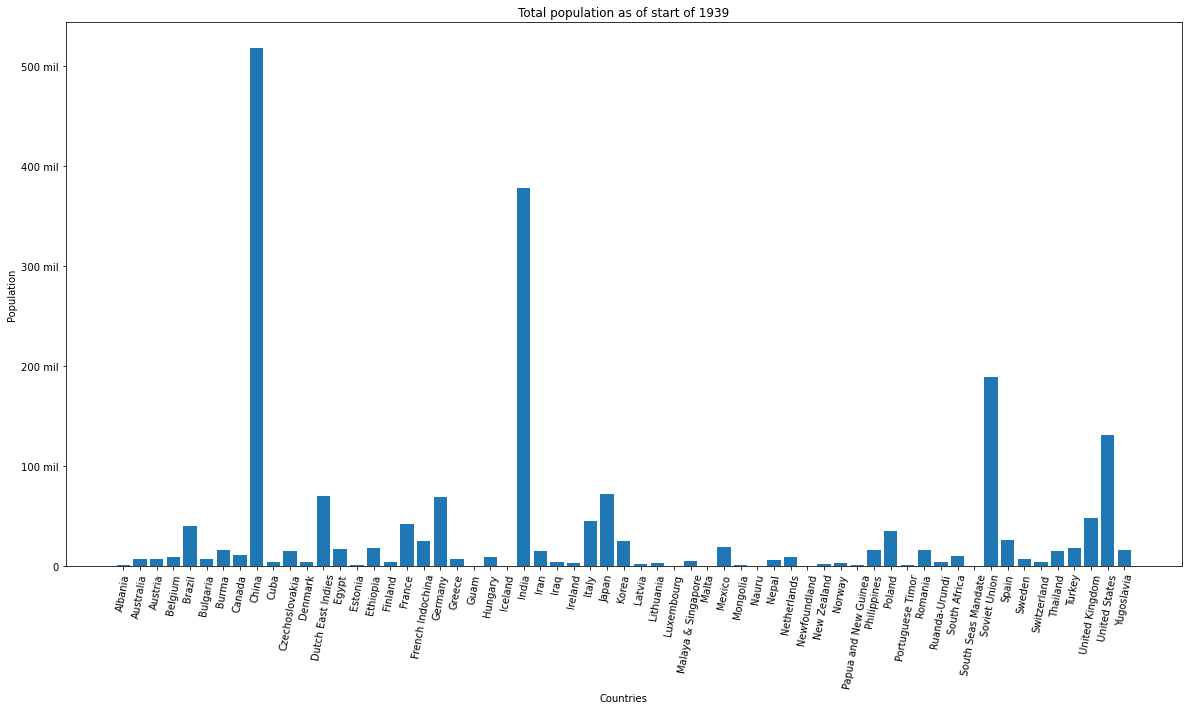

In [53]:
plt.figure(figsize = (20, 10))
plt.bar(range(len(countries)), population)
ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation = 80)
ax.set_yticklabels(["0", "100 mil", "200 mil", "300 mil", "400 mil", "500 mil"])
plt.xlabel("Countries")
plt.ylabel("Population")
plt.title("Total population as of start of 1939")
plt.show()

<ipython-input-47-8aa56565b344>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-47-8aa56565b344>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "2 mil", "4 mil", "6 mil", "8 mil", "10 mil"])


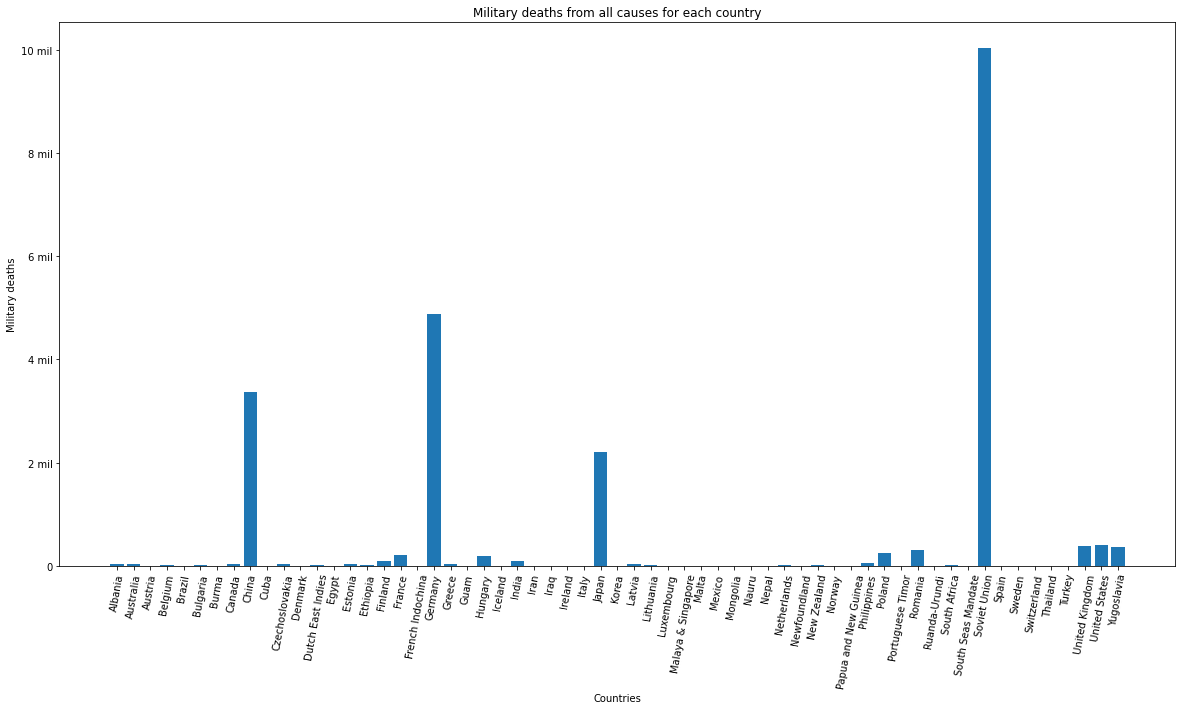

In [47]:
plt.clf
plt.figure(figsize=(20, 10))
plt.bar(range(len(countries)), military_deaths)
ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation = 80)
ax.set_yticklabels(["0", "2 mil", "4 mil", "6 mil", "8 mil", "10 mil"])
plt.xlabel("Countries")
plt.ylabel("Military deaths")
plt.title("Military deaths from all causes for each country")
plt.show()

<ipython-input-48-b24998dff4c2>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-48-b24998dff4c2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "1 mil", "2 mil", "3 mil", "4 mil", "5 mil", "6 mil", "7 mil", "8 mil"])


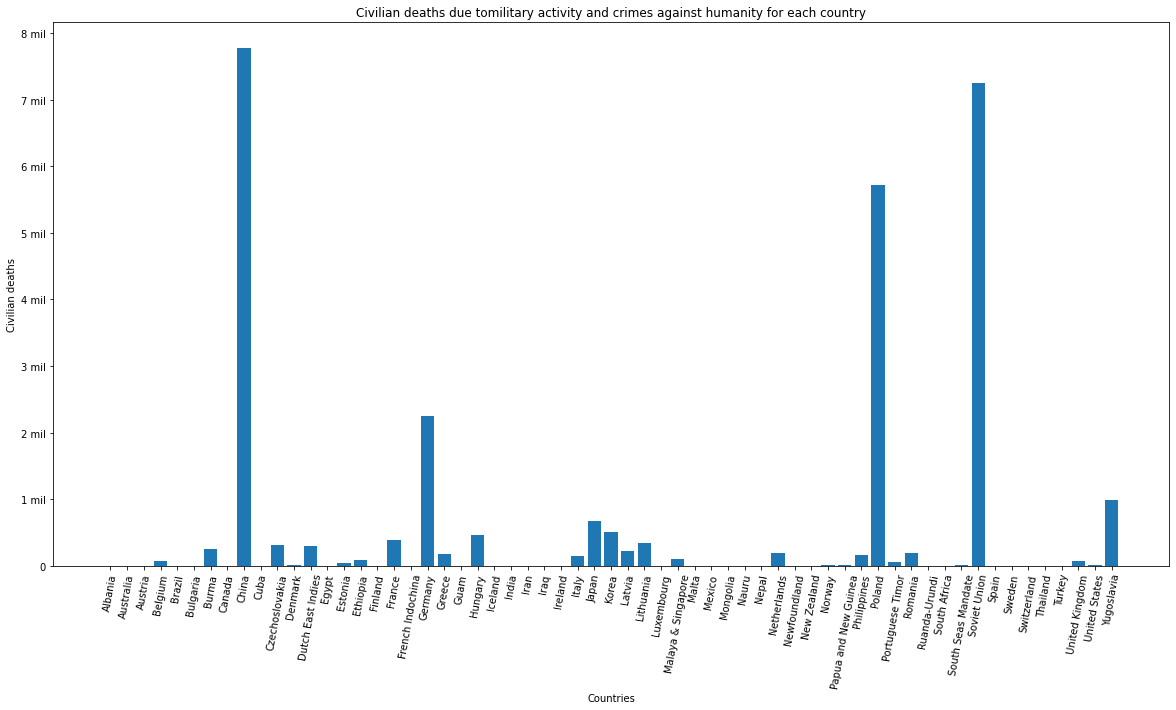

In [48]:
plt.clf
plt.figure(figsize=(20, 10))
plt.bar(range(len(countries)), civilian_deaths)
ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation = 80)
ax.set_yticklabels(["0", "1 mil", "2 mil", "3 mil", "4 mil", "5 mil", "6 mil", "7 mil", "8 mil"])
plt.xlabel("Countries")
plt.ylabel("Civilian deaths")
plt.title("Civilian deaths due tomilitary activity and crimes against humanity for each country")
plt.show()

<ipython-input-49-ca66efd12134>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-49-ca66efd12134>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "5 mil", "10 mil", "15 mil", "20 mil"])


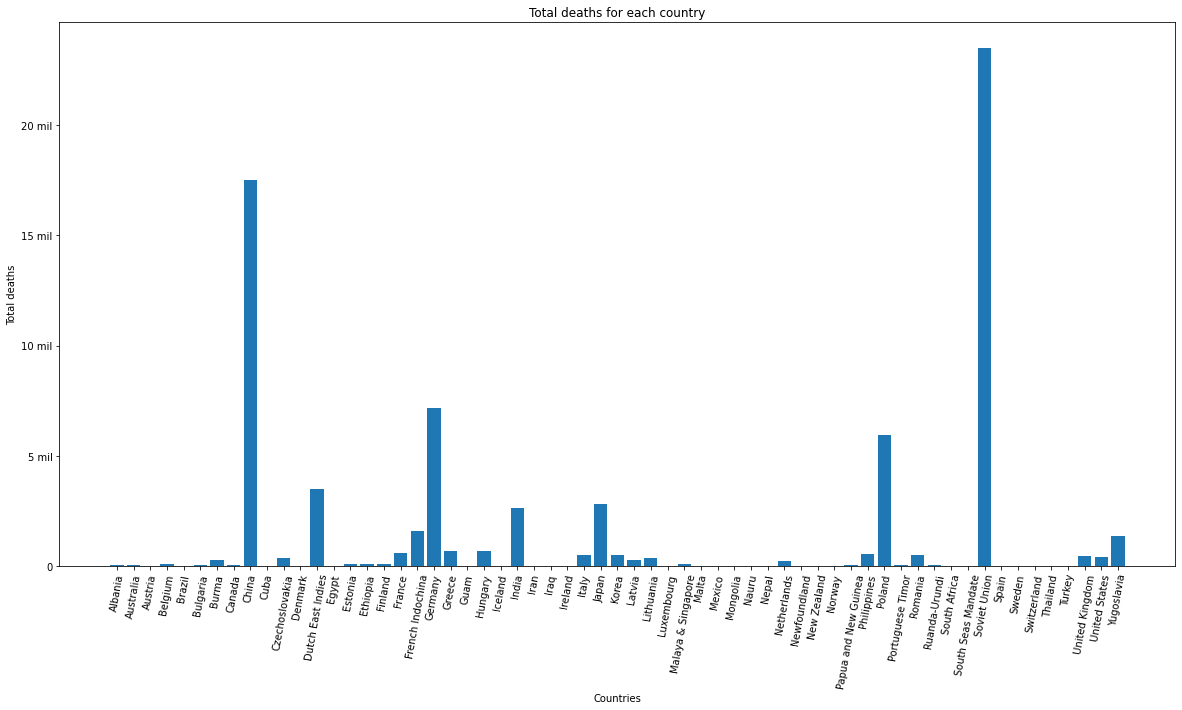

In [49]:
plt.clf
plt.figure(figsize=(20, 10))
plt.bar(range(len(countries)), total_deaths)
ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation = 80)
ax.set_yticklabels(["0", "5 mil", "10 mil", "15 mil", "20 mil"])
plt.xlabel("Countries")
plt.ylabel("Total deaths")
plt.title("Total deaths for each country")
plt.show()

<ipython-input-50-470de2a005b3>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-50-470de2a005b3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "2%", "4%", "6%", "8%", "10%", "12%", "14%", "16%"])


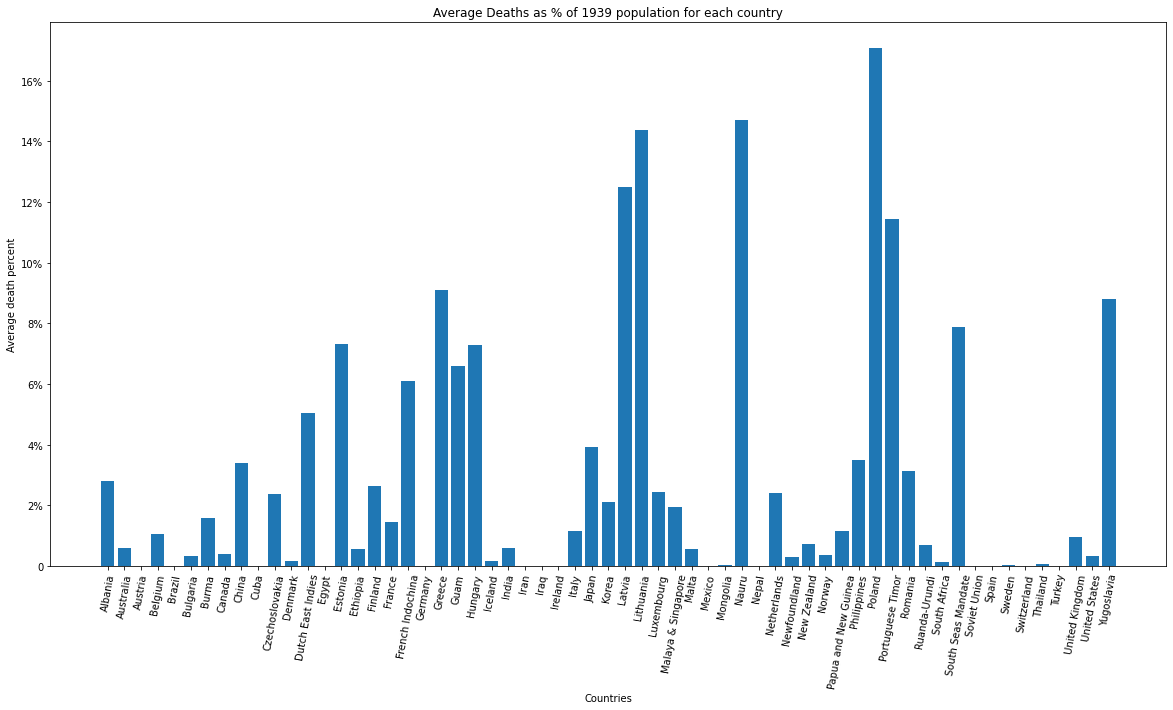

In [50]:
plt.clf
plt.figure(figsize=(20, 10))
plt.bar(range(len(countries)), average_population_deaths)
ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation = 80)
ax.set_yticklabels(["0", "2%", "4%", "6%", "8%", "10%", "12%", "14%", "16%"])
plt.xlabel("Countries")
plt.ylabel("Average death percent")
plt.title("Average Deaths as % of 1939 population for each country")
plt.show()

<ipython-input-51-55253e9c78e3>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-51-55253e9c78e3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "2 mil", "4 mil", "6 mil", "8 mil", "10 mil", "12 mil", "14mil"])


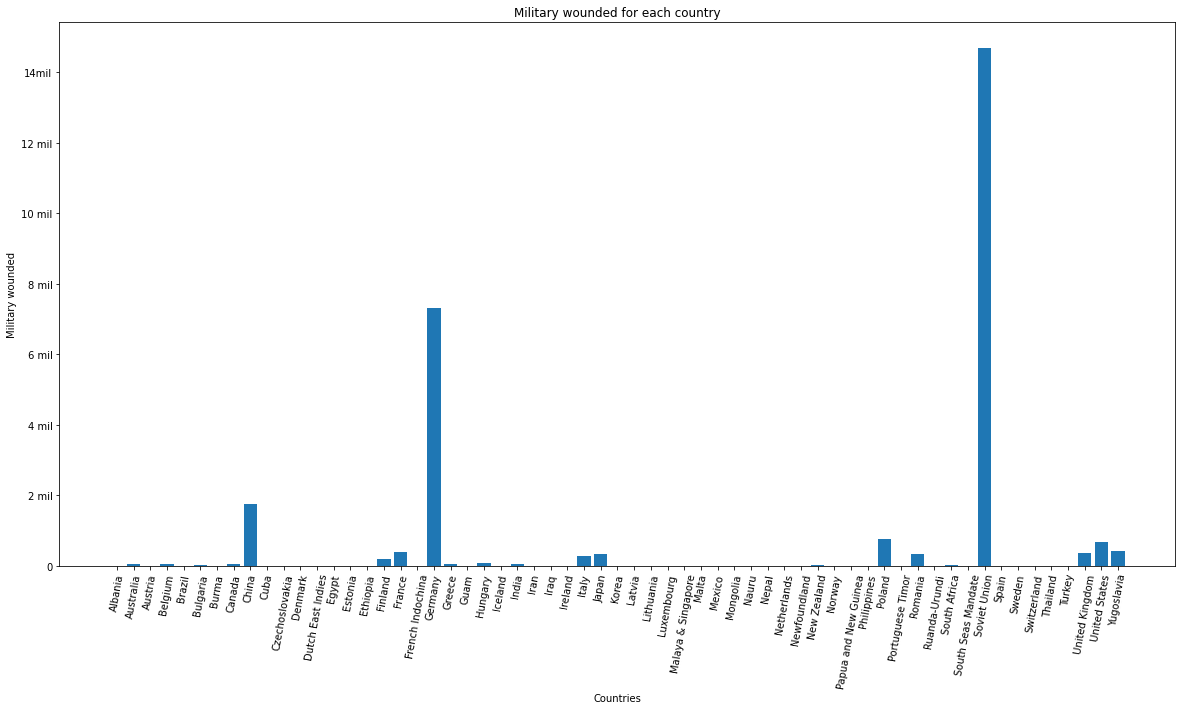

In [51]:
plt.clf
plt.figure(figsize=(20, 10))
plt.bar(range(len(countries)), military_wounded)
ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation = 80)
ax.set_yticklabels(["0", "2 mil", "4 mil", "6 mil", "8 mil", "10 mil", "12 mil", "14mil"])
plt.xlabel("Countries")
plt.ylabel("Military wounded")
plt.title("Military wounded for each country")
plt.show()